# Week 2 exercise

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Project 2
### Randomly select N (let's say 10) years out of the existing data from the last 141 years, and average July temperature of Atlanta for those years. Repeat this 1,000 times. Will it follow CLT?

In [2]:
# get the data
df=pd.read_excel('ATL_MonMeanTemp_1879_2020.xls',skiprows=1)
df

,Year,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5
1,1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1
2,1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6
3,1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4
4,1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2016,42.4,48.5,60.5,64.1,71.1,81.0,83.4,82.7,78.8,69.6,58.9,48.9
138,2017,52.0,56.1,57.7,67.8,71.1,76.6,81.2,79.2,73.8,65.7,56.2,46.8
139,2018,40.4,57.3,53.5,59.8,74.8,79.8,80.8,79.7,81.0,67.4,50.3,48.6
140,2019,45.9,53.8,55.4,65.3,76.4,77.7,82.2,82.5,82.4,68.4,52.5,51.2


### line plot for the entire dataset... aka spagetti plot... not very insightful

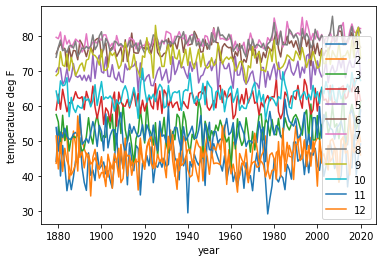

In [3]:
atlanta_temperature=df.to_numpy()
year=atlanta_temperature[:,0]
temp=atlanta_temperature[:,1:13:1]
plt.plot(year,temp)
plt.xlabel('year')
plt.ylabel('temperature deg F')
plt.legend(range(1,13,1))
plt.show()

### contour plot for the entire dataset

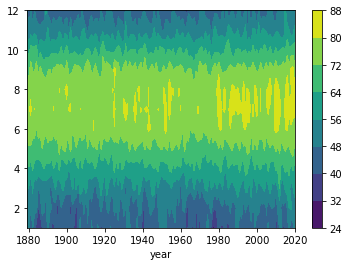

In [4]:
mon=np.arange(1,13,1)
plt.contourf(year,mon,temp.T)
plt.xlabel('year')
plt.colorbar()
plt.show()

In [5]:
# extract July temperature
july=atlanta_temperature[:,7]
N=10
K=1000
mu=np.mean(july)
sig=np.std(july)
print('mean july temp is '+str(mu.round(2))+' deg F')
print('standard deviation is '+str(sig.round(2))+' deg F')

mean july temp is 79.08 deg F
standard deviation is 2.02 deg F


### Bootstrap : repeat sampling

In [6]:
M=np.zeros(K)
for n in range(0,K):
    data=np.random.choice(july,10,replace=False)
    M[n]=np.mean(data)

### 1. Mean of sample mean is population mean

In [7]:
Mmean=np.mean(M)
print('Mean of sample mean is '+str(Mmean.round(2))+'deg F')

Mean of sample mean is 79.09deg F


### 2. Standard deviation of sample mean is standard error

In [8]:
Mstd=np.std(M)
SE = sig/np.sqrt(N)
print('std of sample mean is '+str(Mstd.round(2))+' deg F')
print('sigma/sqrt(N) is '+str(SE.round(2))+' deg F')

std of sample mean is 0.6 deg F
sigma/sqrt(N) is 0.64 deg F


### 3. Sample mean follows Gaussian distribution

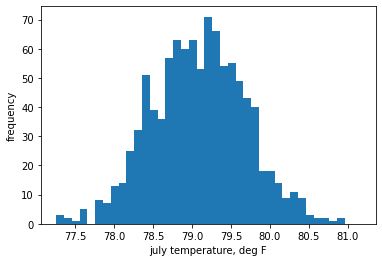

In [9]:
bins=np.arange(np.min(M),np.max(M),0.1)
plt.hist(M,bins)
plt.xlabel('july temperature, deg F')
plt.ylabel('frequency');
plt.show()

### Overlay Gaussian

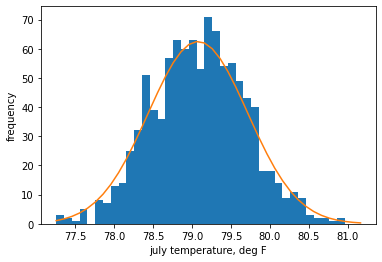

In [10]:
plt.hist(M,bins)
x=bins
f=K*0.1/np.sqrt(2*np.pi)/SE*np.exp(-0.5*((x-mu)/SE)**2)
plt.plot(x,f)
plt.xlabel('july temperature, deg F')
plt.ylabel('frequency');

### calculate 95 percentile score of sample mean

In [11]:
t95=np.percentile(M,95)
print('95 percentile temp is '+str(t95.round(2))+' deg F')

95 percentile temp is 80.07 deg F


### calculate 99 percentile score of sample mean

In [12]:
t99=np.percentile(M,99)
print('99 percentile temp is '+str(t99.round(2))+' deg F')

99 percentile temp is 80.47 deg F


### calculate last N years average

In [13]:
tN=np.mean(july[-N:])
print('Last N year mean temp is '+str(tN.round(2))+' deg F')

Last N year mean temp is 81.26 deg F
